In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from helper import fn_plot_torch_hist, fn_plot_confusion_matrix

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
inpDir = os.path.join( '..', 'input')


###moduleDir = 'MACHINE LEARNING'

outDir = os.path.join('output')
subDir = 'fifa_2019'

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

ALPHA = 0.001     # learning rate
EPOCHS = 3001


# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 150,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE=0.2

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

<Figure size 1500x600 with 0 Axes>

In [3]:
data_df=pd.read_csv(os.path.join(inpDir, 'fifa_2019.csv'))
data_df

,Unnamed: 0,ID,Name,Age,...,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,...,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,...,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,...,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,...,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,...,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,...,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,...,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,...,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,...,14.0,8.0,9.0,€143K


In [4]:
data_df.head()

,Unnamed: 0,ID,Name,Age,...,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,...,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,...,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,...,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,...,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,...,5.0,10.0,13.0,€196.4M


In [5]:
cols = data_df.columns
for col in cols:
    print(f'\nColumns Name: {col} : {data_df[col].unique()}')


Columns Name: Unnamed: 0 : [    0     1     2 ... 18204 18205 18206]

Columns Name: ID : [158023  20801 190871 ... 241638 246268 246269]

Columns Name: Name : ['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'B. Worman'
 'D. Walker-Rice' 'G. Nugent']

Columns Name: Age : [31 33 26 27 32 25 29 28 24 30 19 40 22 23 34 35 36 37 21 18 20 39 41 17
 38 45 42 16 44]

Columns Name: Photo : ['https://cdn.sofifa.org/players/4/19/158023.png'
 'https://cdn.sofifa.org/players/4/19/20801.png'
 'https://cdn.sofifa.org/players/4/19/190871.png' ...
 'https://cdn.sofifa.org/players/4/19/241638.png'
 'https://cdn.sofifa.org/players/4/19/246268.png'
 'https://cdn.sofifa.org/players/4/19/246269.png']

Columns Name: Nationality : ['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria

In [6]:
data_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
data_df = data_df[data_df['Position'].notnull()]
data_df.head()

,Unnamed: 0,ID,Name,Age,...,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,...,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,...,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,...,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,...,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,...,5.0,10.0,13.0,€196.4M


In [8]:
# Following columns appear to be relevant for our analysis
rel_cols = ['Position', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
            'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
            'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
            'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
            'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
            'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
            'GKKicking', 'GKPositioning', 'GKReflexes']

In [9]:
data_df = data_df[rel_cols]
data_df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,...,GKHandling,GKKicking,GKPositioning,GKReflexes
0,RF,95.0,70.0,90.0,...,11.0,15.0,14.0,8.0
1,ST,94.0,89.0,81.0,...,11.0,15.0,14.0,11.0
2,LW,87.0,62.0,84.0,...,9.0,15.0,15.0,11.0
3,GK,13.0,21.0,50.0,...,85.0,87.0,88.0,94.0
4,RCM,82.0,55.0,92.0,...,13.0,5.0,10.0,13.0


In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18147 entries, 0 to 18206
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Position         18147 non-null  object 
 1   Finishing        18147 non-null  float64
 2   HeadingAccuracy  18147 non-null  float64
 3   ShortPassing     18147 non-null  float64
 4   Volleys          18147 non-null  float64
 5   Dribbling        18147 non-null  float64
 6   Curve            18147 non-null  float64
 7   FKAccuracy       18147 non-null  float64
 8   LongPassing      18147 non-null  float64
 9   BallControl      18147 non-null  float64
 10  Acceleration     18147 non-null  float64
 11  SprintSpeed      18147 non-null  float64
 12  Agility          18147 non-null  float64
 13  Reactions        18147 non-null  float64
 14  Balance          18147 non-null  float64
 15  ShotPower        18147 non-null  float64
 16  Jumping          18147 non-null  float64
 17  Stamina          

In [11]:
data_df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [12]:
goalkeeper = 'GK'
forward = ['RF', 'ST', 'LW', 'RW', 'LF', 'RS', 'LS', 'CF']
midfielder = ['CM', 'RCM', 'LCM', 'CDM', 'RDM', 'LDM', 'CAM', 'LAM', 'RAM', 'RM', 'LM']
defender = ['CB', 'RCB', 'LCB', 'RWB', 'LWB', 'RB', 'LB']

In [13]:
len(data_df['Position'].unique()) - len(forward) - len(midfielder) - len(defender)

1

In [14]:
# Assign labels to goalkeepers
data_df.loc[data_df['Position'] == 'GK', 'Position'] = 0

# Defenders
data_df.loc[data_df['Position'].isin(defender), 'Position'] = 1

# Mid-fielders
data_df.loc[data_df['Position'].isin(midfielder), 'Position'] = 2

# Forwards
data_df.loc[data_df['Position'].isin(forward), 'Position'] = 3

# Assist Pandas in data conversion
data_df['Position'] = pd.to_numeric(data_df['Position'], downcast = 'integer')

In [15]:
labels_dic = {0: 'Goalkeeper', 1: 'Defender', 2: 'Mid-Fielder', 3: 'Forward'}

In [16]:
features_df = data_df.drop('Position', axis = 1)
labels = data_df.Position

In [17]:
labels = pd.get_dummies(labels)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels,
                                                    test_size = TEST_SIZE, stratify = labels,
                                                    random_state = RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14517, 33), (3630, 33), (14517, 4), (3630, 4))

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Prapare Model -  Sequential

In [20]:
torch.version.cuda

'11.7'

In [21]:
torch.cuda.current_device()

0

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [23]:
torch.cuda.get_device_name(torch.cuda.current_device())

'NVIDIA GeForce RTX 2060 SUPER'

In [24]:
input_dim = X_train.shape[1]     # number pf cols in fratures

model = nn.Sequential(nn.Linear(input_dim, 18),
                      nn.ReLU(),
                      nn.Linear(18,4)
                      )
model = model.to(device)

In [25]:
print(model)

Sequential(
  (0): Linear(in_features=33, out_features=18, bias=True)
  (1): ReLU()
  (2): Linear(in_features=18, out_features=4, bias=True)
)


In [26]:
print(f'Number of parameter: {len(list(model.parameters()))}')

Number of parameter: 4


In [27]:
print(f'Layer 1 Weights: {list(model.parameters())[0].shape}')
print(f'Layer 1 Bias   : {list(model.parameters())[1].shape}')
print(f'Layer 2 Weights: {list(model.parameters())[2].shape}')
print(f'Layer 2 Bias   : {list(model.parameters())[3].shape}')

Layer 1 Weights: torch.Size([18, 33])
Layer 1 Bias   : torch.Size([18])
Layer 2 Weights: torch.Size([4, 18])
Layer 2 Bias   : torch.Size([4])


In [28]:
train_X = Variable(torch.Tensor(X_train)).to(device)

test_X = Variable(torch.Tensor(X_test)).to(device)

train_y = Variable(torch.Tensor(y_train.to_numpy())).to(device)

test_y = Variable(torch.Tensor(y_test.to_numpy())).to(device)

In [29]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = ALPHA)

loss, tloss, n_epoch, acc, tacc = [],[],[],[],[]
for epoch in range(EPOCHS):
    
    model.train() # set your model in train mode
    
    predict = model(train_X) # Make perdiction
    
    curr_loss = loss_fn(predict, train_y) # Calculate loss
    
    ### Back Propogation 
    
    optimizer.zero_grad()
    curr_loss.backward()
    optimizer.step()
    
    loss.append(curr_loss.data.item())
    
    _, y_pred = torch.max(predict, 1)
    
    curr_acc = accuracy_score(y_train.to_numpy().argmax(axis = 1), y_pred.data.cpu())
    
    acc.append(curr_acc)
    
    model.eval() # Do not update your weights
    
    predict_tst = model(test_X) # Make perdiction
    
    curr_loss_tst = loss_fn(predict_tst, test_y) # Calculate loss
    
    tloss.append(curr_loss_tst.data.item())
    
    
    _, y_pred = torch.max(predict_tst, 1)
    
    curr_acc_tst = accuracy_score(y_test.to_numpy().argmax(axis = 1), y_pred.data.cpu())
    
    
    tacc.append(curr_acc_tst)
    
    n_epoch.append(epoch)

In [30]:
loss_df = pd.DataFrame({'epoch': n_epoch,
                       "loss": loss,
                       'test loss': tloss,
                       'acc': acc,
                       'test acc': tacc})

loss_df.head()

,epoch,loss,test loss,acc,test acc
0,0,1.51,1.49,0.16,0.19
1,1,1.49,1.47,0.18,0.21
2,2,1.48,1.46,0.19,0.22
3,3,1.46,1.44,0.21,0.24
4,4,1.45,1.43,0.23,0.25


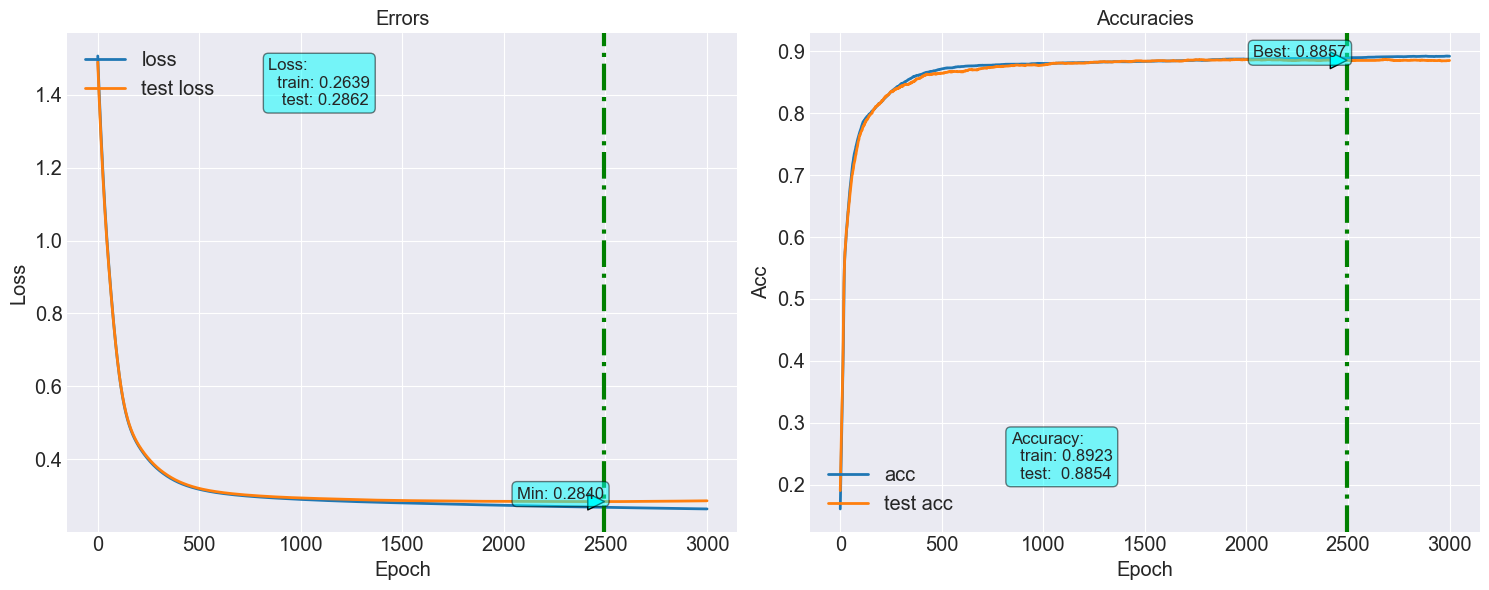

In [31]:
fn_plot_torch_hist(loss_df)

In [32]:
predict = model(train_X)
    
_, y_pred = torch.max(predict, 1)
    
accuracy_score(y_train.to_numpy().argmax(axis = 1), y_pred.data.cpu())
    
    

0.8922642419232624

In [33]:
predict = model(test_X)
    
_, y_pred = torch.max(predict, 1)
    
accuracy_score(y_test.to_numpy().argmax(axis = 1), y_pred.data.cpu())
    
    

0.8853994490358127